# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filename1 = 'pionminus'
filename2 = 'electron'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

In [3]:
data1 = pd.read_csv(filepath+f'{filename1}.csv')
data1.loc[data1['phi0'] > -99, 'phi0'] = 0
data2 = pd.read_csv(filepath+f'{filename2}.csv')
data2.loc[data2['phi0'] > -99, 'phi0'] = 1

In [4]:
data = pd.concat([data1,data2], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = pd.concat([data,data1], sort=False)
data = data.sample(frac = 1)
data['phi0'] = data['phi0'].astype('int32')
data['centrality'] = data['centrality'].astype('int32')
data['zvertex'] = data['zvertex'].astype('float16')
data['pt'] = data['pt'].astype('float16')
data['e/p'] = data['e/p'].astype('float16')
data['n0'] = data['n0'].astype('int32')
data['disp'] = data['disp'].astype('float16')
data['chi2'] = data['chi2'].astype('float16')
data['npe0'] = data['npe0'].astype('int32')
data['prob'] = data['prob'].astype('float16')
data.head()

,centrality,zvertex,pt,e/p,n0,disp,chi2,npe0,prob,phi0
294765,9,-4.714844,0.463623,0.634766,2,5.847656,23.953125,4,0.431396,0
51406,31,2.576172,1.032227,0.807129,2,1.975586,74.375000,1,0.000346,0
564930,10,-2.160156,0.415771,0.925781,5,1.049805,47.781250,10,0.317383,1
134083,81,4.621094,0.470947,0.654785,3,3.798828,28.890625,4,0.000041,0
1591268,92,-1.713867,0.573730,0.987793,5,1.404297,23.953125,9,0.447021,1


In [5]:
data['disp2'] = data.apply(lambda row: row['disp']**2, axis=1)
data['n0*disp'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp']), axis=1)
data['n0*disp2'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp'])**0.5, axis=1)
data['chi2/npe0'] = data.apply(lambda row: row['chi2']/(row['npe0']+0.001), axis=1)
data['e/p*prob'] = data.apply(lambda row:  math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2*(row['prob']), axis=1)
data['n0*prob'] = data.apply(lambda row: (row['n0']-2)*(row['prob']+0.001), axis=1)
data['prob-1'] = data.apply(lambda row: 1./(1.00001-row['prob'])**0.5, axis=1)
data['e/p*pt'] = data.apply(lambda row: ((row['pt'])**0.5)*math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
data['n0*pt'] = data.apply(lambda row: (row['n0']-2)*(row['pt']+0.001)**0.5, axis=1)
#data['e/p*centrality'] = data.apply(lambda row: row['e/p']*(row['centrality']+0.001)**0.5, axis=1)
#data['n0*centrality'] = data.apply(lambda row: row['n0']*(row['centrality']+0.001)**0.5, axis=1)
data['n0-2'] = data.apply(lambda row: (row['n0']-2)*(row['n0']), axis=1)
data['e/p-0.8'] = data.apply(lambda row: math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
data['pt-1'] = data.apply(lambda row: row['pt']**-1, axis=1)
data['pt2'] = data.apply(lambda row: row['pt']**2, axis=1)
data['centrality-2'] = data.apply(lambda row: row['centrality']**-2, axis=1)
data.head()

,centrality,zvertex,pt,e/p,n0,disp,chi2,npe0,prob,phi0,...,e/p*prob,n0*prob,prob-1,e/p*pt,n0*pt,n0-2,e/p-0.8,pt-1,pt2,centrality-2
294765,9,-4.714844,0.463623,0.634766,2,5.847656,23.953125,4,0.431396,0,...,-1.177816e-02,0.000000,1.326146,-0.018590,0.000000,0.0,-0.027302,2.156925,0.214946,0.012346
51406,31,2.576172,1.032227,0.807129,2,1.975586,74.375000,1,0.000346,0,...,1.756928e-08,0.000000,1.000168,0.000052,0.000000,0.0,0.000051,0.968780,1.065492,0.001041
564930,10,-2.160156,0.415771,0.925781,5,1.049805,47.781250,10,0.317383,1,...,5.021289e-03,0.955148,1.210342,0.010201,1.936735,15.0,0.015821,2.405167,0.172866,0.010000
134083,81,4.621094,0.470947,0.654785,3,3.798828,28.890625,4,0.000041,0,...,-8.647500e-07,0.001041,1.000016,-0.014471,0.686984,3.0,-0.021087,2.123380,0.221791,0.000152
1591268,92,-1.713867,0.573730,0.987793,5,1.404297,23.953125,9,0.447021,1,...,1.576475e-02,1.344064,1.344751,0.026712,2.274329,15.0,0.035266,1.742979,0.329167,0.000118


In [6]:
print(data.size, data.shape, data1.shape, data2.shape)

141659112 (5902463, 24) (348012, 10) (1726319, 10)


In [7]:
# удалим лишние колонки
data = data.drop(columns = ['zvertex'])

In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(3, 3, figsize=(15, 6))
    for i, feature in enumerate(['centrality', 'pt', 'e/p', 'n0', 'disp', 'chi2', 'npe0', 'prob', 'phi0']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)



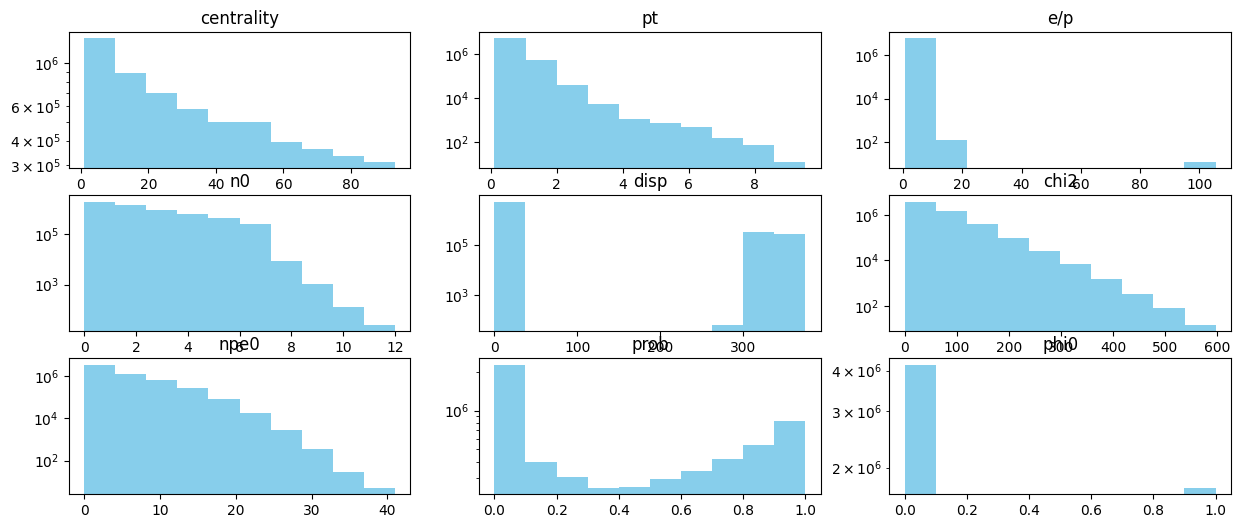

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
from sklearn.preprocessing import OneHotEncoder

def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # удаляем impressions
    data = data.drop('impressions', axis = 1)
    
    # создаем фичи от времени
    data.date_time = pd.to_datetime(data.date_time)
    data['day'] = data['date_time'].dt.weekday
    data['hour'] = data['date_time'].dt.hour
    
    # строим графики зависимости количества кликов от дня недели и часа
    data[data['clicks'] > 0].sort_values(by = ['day']).groupby(['day'])['clicks'].sum().plot.barh(title='Clicks by weekday')
    plt.show()
    data[data['clicks'] > 0].sort_values(by = ['hour']).groupby(['hour'])['clicks'].sum().plot.barh(title='Clicks by hour')

    # добавляем интерсекции между часом и днем недели 
    data['hour_day'] = data['day'].astype(str) + ' ' + data['hour'].astype(str)
    data['hour_day'] = pd.factorize(data['hour_day'])[0]
    
    # выделяем редкие zone id в категорию -1
    zone_id_counts = data['zone_id'].value_counts()
    idxs = zone_id_counts[zone_id_counts < 10].index
    
    data.loc[data['zone_id'].isin(idxs), 'zone_id'] = -1
    
    # выделяем редкие os_id в категорию 7
    data.loc[data['os_id'] > 7, 'os_id'] = 7
    
    # преобразовываем campaign clicks в бинарную фичу
    data['before_clicks'] = data['campaign_clicks'] > 0
    data['before_clicks'] = data['before_clicks'].astype('int64')
    
    # делим выборку на train и test
    data = data.sort_values(by='date_time', ignore_index=True)
    cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    y = data['clicks']
    data = data.drop(columns = ['banner_id', 'clicks', 'campaign_clicks', 'date_time'])
    data_train, data_test = data.iloc[:cut_off_test, :], data.iloc[cut_off_test:, :]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    enc.fit(data_train)
    transformed_train = enc.transform(data_train)
    transformed_test = enc.transform(data_test)
    
    return transformed_train, transformed_test, y_train, y_test,cut_off_val

In [11]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['phi0']
    data = data.drop(columns = ['phi0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [12]:
transformed_train_all, transformed_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

1967487 3934976


In [13]:
transformed_test

,centrality,pt,e/p,n0,disp,chi2,npe0,prob,disp2,n0*disp,...,e/p*prob,n0*prob,prob-1,e/p*pt,n0*pt,n0-2,e/p-0.8,pt-1,pt2,centrality-2
273478,80,0.581543,2.208984,0,364.750000,41.250000,0,0.013863,133042.562500,-0.005468,...,2.752057e-02,-0.029725,1.006999,1.513921,-1.526490,-0.0,1.985237,1.719563,0.338192,0.000156
304568,58,0.488525,0.697754,0,340.000000,18.343750,0,0.186035,115600.000000,-0.005865,...,-1.944861e-03,-0.374070,1.108395,-0.007307,-1.399322,-0.0,-0.010454,2.046977,0.238657,0.000297
106192,83,0.570312,0.961426,1,7.859375,93.562500,2,0.000016,61.769775,-0.112875,...,4.084902e-07,-0.001016,1.000003,0.019679,-0.755852,-1.0,0.026058,1.753425,0.325256,0.000145
1362317,63,0.971680,1.015625,5,1.789062,89.312500,18,0.243164,3.200745,1.075630,...,1.130570e-02,0.732492,1.149466,0.045831,2.958736,15.0,0.046494,1.029146,0.944161,0.000252
345835,51,0.481445,0.979492,2,5.132812,89.062500,1,0.000018,26.345764,0.000000,...,5.703319e-07,0.000000,1.000004,0.022354,0.000000,0.0,0.032217,2.077079,0.231790,0.000384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169715,11,0.527344,0.733887,3,2.880859,38.875000,4,0.006050,8.299351,0.257675,...,-2.644482e-05,0.007050,1.003034,-0.003174,0.726873,3.0,-0.004371,1.896296,0.278091,0.008264
141044,15,0.632324,1.473633,2,3.095703,116.812500,6,0.001205,9.583378,0.000000,...,5.470079e-04,0.000000,1.000598,0.360841,0.000000,0.0,0.453781,1.581467,0.399834,0.004444
202747,4,0.502930,0.666992,2,7.628906,15.554688,2,0.515625,58.200211,0.000000,...,-9.121962e-03,0.000000,1.436828,-0.012546,0.000000,0.0,-0.017691,1.988350,0.252938,0.062500
272747,5,1.568359,0.871582,5,3.878906,27.906250,11,0.083130,15.045914,0.614892,...,4.259565e-04,0.252390,1.044344,0.006417,3.758222,15.0,0.005124,0.637609,2.459751,0.040000


In [14]:
transformed_train, transformed_val = transformed_train_all[:cut_off_val], transformed_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss, f1_score

In [16]:
def create_model(C):
    clf = LogisticRegression(solver='newton-cholesky', max_iter=10000, C=C, verbose=1)
    return clf

Возьмем логистическую регрессию, в качестве солвера берем newton-cholesky, так как в документации sklearn сказано, что он лучше работает с one-hot-encoded фичами.

# Cross Validation

In [17]:
def cv(data_train: pd.DataFrame, data_val, y_train, y_val):
    best_score = 0.5
    best_C = 0.1
    for C in [0.0001,0.001,0.01,0.05,0.1,1,10,100,1000,10000]:
        clf = create_model(C)
        clf.fit(data_train, y_train)
        y_pred_probs = clf.predict_proba(data_val)
        score = roc_auc_score(y_val, y_pred_probs[:, 1])
        if score > best_score:
            best_score = score
            best_C = C
            print("localy best C:", best_C)       
    print("the best C:", best_C)        
    best_model = create_model(best_C)
    return best_model

In [18]:
print(transformed_val.shape,y_val.shape)

(1967489, 22) (1967489,)


In [19]:
clf = cv(transformed_train, transformed_val, y_train, y_val)

Newton iter=1
  Check Convergence
    1. max |gradient| 1315.2841843568065 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 500.1696516378593 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 247.34359854038877 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 133.47857374986714 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 40.06034838520961 <= 0.0001
Newton iter=6
  Check Convergence
    1. max |gradient| 4.072288659237741 <= 0.0001
Newton iter=7
  Check Convergence
    1. max |gradient| 0.04775362092078126 <= 0.0001
Newton iter=8
  Check Convergence
    1. max |gradient| 6.548312859874939e-06 <= 0.0001
    2. Newton decrement 8.293457527972706e-11 <= 0.0001
  Solver did converge at loss = 0.28915004623306007.
localy best C: 0.0001
Newton iter=1
  Check Convergence
    1. max |gradient| 1316.2603010616715 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 492.6848644766787 <= 0.0001
Newton iter=3
  Che

Обучаем лучшую модель заново на тренировочном и валидационном датасете.

In [20]:
clf.fit(transformed_train_all, y_train_all)

Newton iter=1
  Check Convergence
    1. max |gradient| 1306.9485332722916 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 475.01661256173594 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 192.89026454653725 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 87.21967201160136 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 30.756230585325387 <= 0.0001
Newton iter=6
  Check Convergence
    1. max |gradient| 4.571338733796553 <= 0.0001
Newton iter=7
  Check Convergence
    1. max |gradient| 0.17492999887090926 <= 0.0001
Newton iter=8
  Check Convergence
    1. max |gradient| 0.0018270468129683486 <= 0.0001
Newton iter=9
  Check Convergence
    1. max |gradient| 3.604976836479762e-07 <= 0.0001
    2. Newton decrement 2.2664936627974441e-10 <= 0.0001
  Solver did converge at loss = 0.26451881306510067.


LogisticRegression(C=0.1, max_iter=10000, solver='newton-cholesky', verbose=1)

# Model Evaluation

In [21]:
y_pred_probs = clf.predict_proba(transformed_test)
y_pred = clf.predict(transformed_test)

In [22]:
clf

LogisticRegression(C=0.1, max_iter=10000, solver='newton-cholesky', verbose=1)

Посчитаем скоры (ROC AUC, log loss и f1 score).

log loss: 0.2619375887412119
roc auc: 0.9481483438695795
f1 score: 0.814721040667972


Text(0.5, 1.0, 'ROC AUC Curve')

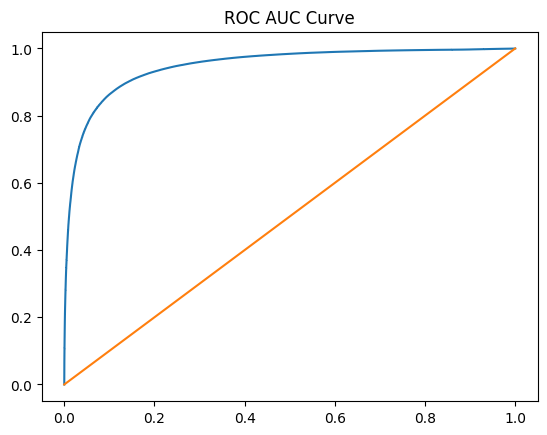

In [23]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.title('ROC AUC Curve')

Сравним со скорами из бейзлайна. Бейзлайн: предсказываем все нулями

In [24]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.6046656622073054


Видим, что наша модель обгоняет бейзлайн по метрикам ROC AUC и Log Loss.

In [36]:
i = 7700
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.512 0.0221
0.8507290172355636 0.011309168296379988 0.5123616216948023
2247.3605635015006 4386.27810581836


In [37]:
print(clf.intercept_)
for keff in clf.coef_[0]:
    print(keff)
output_data = [clf.intercept_,clf.coef_[0]]
with open("output/keffs.txt", "w") as txt_file:
    for line in output_data:
        txt_file.write("".join(str(line)) + "\n")

[-4.38731612]
0.021653493821300517
3.0703679082864372
4.019698376213128
-2.3918027659686167
-0.2609367517035133
-0.0031047872584966762
0.22378538986466356
2.5095988682357806
0.0006858649987125751
-8.490692846520423
11.578361860710862
6.974499575091511e-06
-3.294902413525313
0.04942085866651463
-0.005850577330624031
-3.866374132979058
0.03954182730900282
-0.18809269916055837
0.25440770954935954
0.5118794949343476
-0.57786174271196
-0.3795448185587075


In [27]:
def answer(centrality,pt,ep,n0,disp,chi2,npe0,prob):
    ans = clf.coef_[0][0]*centrality+clf.coef_[0][1]*pt+clf.coef_[0][2]*ep+clf.coef_[0][3]*n0+\
        clf.coef_[0][4]*disp+clf.coef_[0][5]*chi2+clf.coef_[0][6]*npe0+clf.coef_[0][7]*prob+clf.intercept_[0]
    return ans

In [28]:
kek_data = data
kek_data = kek_data.drop(columns = ['phi0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.028504369743252853


In [44]:
mycute,mycuth, AIcute, AIcuth = 0, 0, 0, 0
norm_e, norm_h = 0, 0
data0 = data.reset_index()  # make sure indexes pair with number of rows

counter =-1
for index, row in data0.iterrows():
    counter+=1
    if counter>100000: break
    centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 = row['centrality'], row['pt'], row['e/p'], row['n0'], row['disp'], row['chi2'], row['npe0'], row['prob'], row['phi0']
    if pt<0.4 and centrality<0: continue
    if ep>0.8 and n0>=2+disp**2/8 and prob>0.01 and chi2/(npe0+1e-4)<10: 
        if phi0: mycute+=1
        else: mycuth+=1
    if proba_loc[counter][1]>thresholds[i]: 
        if phi0: AIcute+=1
        else: AIcuth+=1
    if phi0: norm_e+=1
    else: norm_h+=1
    if counter<10: 
        print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

[0.97149563 0.02850437] -4.623444628862831
[0.93881684 0.06118316] -2.6077018342569165
[0.15624653 0.84375347] -8.519787999276009
[0.87259147 0.12740853] -5.91647986291793
[0.02266052 0.97733948] -5.926904010977519
[0.9830943 0.0169057] -2.2354633624084297
[0.52897283 0.47102717] -0.7610578534116232
[0.97734665 0.02265335] -4.7189701105482325
[0.9845644 0.0154356] -5.084124665673534
[0.95118221 0.04881779] 0.45396102114834225


In [45]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

29396 70605 0.505 0.013 0.507 0.011 0.022 0.022


In [42]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3))

1.226 1.005 0.819
